# 1. Preprocessing 

### 1.1 Import packages

In [59]:
# Importing required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Importing metrix module to asses the model
from sklearn import metrics
# Importing the RFE: Recursive Feature Elimination
from sklearn.feature_selection import RFE

warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [61]:
# Read data
raw_data_file_path = r"Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv"
df = pd.read_csv(raw_data_file_path)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of DataFrame
df.shape

(9240, 37)

In [4]:
# Let's check the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Let's statistical summary of the DataFrame
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 1.2 Handling Missing Values

In [6]:
# Creating a DataFrame for Columns and their null values percentage
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null.rename(columns={'index':'Column'},inplace=True)
print(df_null.head(3))

        Column  % Null
0  Prospect ID     0.0
1  Lead Number     0.0
2  Lead Origin     0.0


In [7]:
# df['Country'].value_counts()
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [8]:
# Getting columns with high null values percentage
df_high_null = df_null[df_null['% Null']>25].sort_values(by='% Null')
# Columns in the above set will be dropped

# Getting columns with low null values percentage
df_low_null = df_null[df_null['% Null']<25].sort_values(by='% Null')

In [9]:
cols_to_drop = df_high_null.Column.values
cols_to_drop = cols_to_drop[2:]
cols_to_drop

array(['What matters most to you in choosing a course', 'Lead Profile',
       'Tags', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Lead Quality'], dtype=object)

In [10]:
# Dropping Columns with high null values
df.drop(labels=list(cols_to_drop),inplace=True,axis=1)
# Dropping Rows where null values were less 
df.dropna(inplace=True,axis=0)
# Checking results
df.isna().sum()
print("Shape after handling missing values",df.shape)

Shape after handling missing values (4925, 29)


In [11]:
# Creating a list of Object data type columns
obj_cols = df.select_dtypes(np.object).columns.tolist()

In [12]:
# Checking the categorical values in the Object columns
def check_value_counts(col_list):
    for col in col_list:
        print('-----------------------------')
        print(round((df[col].value_counts()/df.shape[0])*100,2))
        print('-----------------------------')

check_value_counts(obj_cols)

-----------------------------
2a272436-5132-4136-86fa-dcc88c88f482    0.02
8700d0b5-e298-4dc3-8ca1-3178b1e2e871    0.02
748adb1a-21e0-4170-bc0f-7defd6ef4086    0.02
39e9a1e3-f5a0-44c8-858b-12bf63f4c9b2    0.02
b3d45fb0-c238-44bb-a936-e42146e908f9    0.02
fed3a339-8986-43e3-bc64-2e63d06a23d4    0.02
c3ded2fb-0f4f-437a-9cf6-a70b24979add    0.02
8a4c7bfe-0dbc-48d5-a0a5-42503631456c    0.02
2b09fd31-9a58-41bd-a965-6762cf307810    0.02
2a2721bd-07fa-473c-98c8-5b9750233fe9    0.02
6d842217-fb88-4bb0-8791-adfee621a1b9    0.02
ce2dc85f-195a-41ef-b91a-d2a720db6afc    0.02
06b92b61-bd27-4ecb-84f5-6a38c0082616    0.02
5c0277a7-15a1-4462-88b8-022d566a261d    0.02
78242456-cfe4-4ef9-af1f-04a4f83a9cbd    0.02
2e4c12d0-aaf7-4c8a-af45-b05333776000    0.02
935b887b-bed0-4d8b-9dbc-e5c0a4729db8    0.02
bdc12860-109d-4668-a1d5-8bbd787d1ada    0.02
7f045bb4-f770-437a-bd7e-9863af503948    0.02
6e34ec24-6cce-405b-ab9d-86ab9a828df6    0.02
ca8a210b-da7f-444b-ad17-b7fc8d41d05d    0.02
3a123ace-28e9-4409-80d6-1

In [13]:
def drop_cols(col_list):
    df.drop(labels=col_list,inplace=True,axis=1)
    print("Shape after dropping columns:",df.shape)
    
# Dropping columns which have highly imbalanced values in the dataset
cols_to_drop_2 = ['Do Not Call','Search','Magazine','Digital Advertisement','Newspaper Article','X Education Forums','Newspaper','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
drop_cols(cols_to_drop_2)

Shape after dropping columns: (4925, 17)


In [14]:
# Dropping columns which do not add value to the dataset
cols_to_drop_3 = ['Prospect ID','How did you hear about X Education','Country','City','Do Not Email']
drop_cols(cols_to_drop_3)

Shape after dropping columns: (4925, 12)


In [15]:
# Specialization columns has value as 'Select', we can consider this error as 'Other' category
df['Specialization'] = df['Specialization'].apply(lambda x:'Other' if x=='Select' else x)

In [16]:
df.drop(labels='Lead Number',inplace=True,axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 1 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             4925 non-null   object 
 1   Lead Source                             4925 non-null   object 
 2   Converted                               4925 non-null   int64  
 3   TotalVisits                             4925 non-null   float64
 4   Total Time Spent on Website             4925 non-null   int64  
 5   Page Views Per Visit                    4925 non-null   float64
 6   Last Activity                           4925 non-null   object 
 7   Specialization                          4925 non-null   object 
 8   What is your current occupation         4925 non-null   object 
 9   A free copy of Mastering The Interview  4925 non-null   object 
 10  Last Notable Activity                   4925 non-null   obje

### 1.3 Encoding and Dummy Variables

In [18]:
df['A free copy of Mastering The Interview'].value_counts()

No     2770
Yes    2155
Name: A free copy of Mastering The Interview, dtype: int64

In [19]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x:1 if x=='Yes' else 0)

In [20]:
# Creating a list of object columns
obj_cols = df.select_dtypes(np.object).columns.tolist()
obj_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Last Notable Activity']

In [21]:
df_final = pd.get_dummies(df,columns=obj_cols,drop_first=True,dtype=int)
df_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [22]:
print("Shape of the DataFrame after creating dummy variables:",df_final.shape)

Shape of the DataFrame after creating dummy variables: (4925, 72)


### 1.4 Correlation Matrix

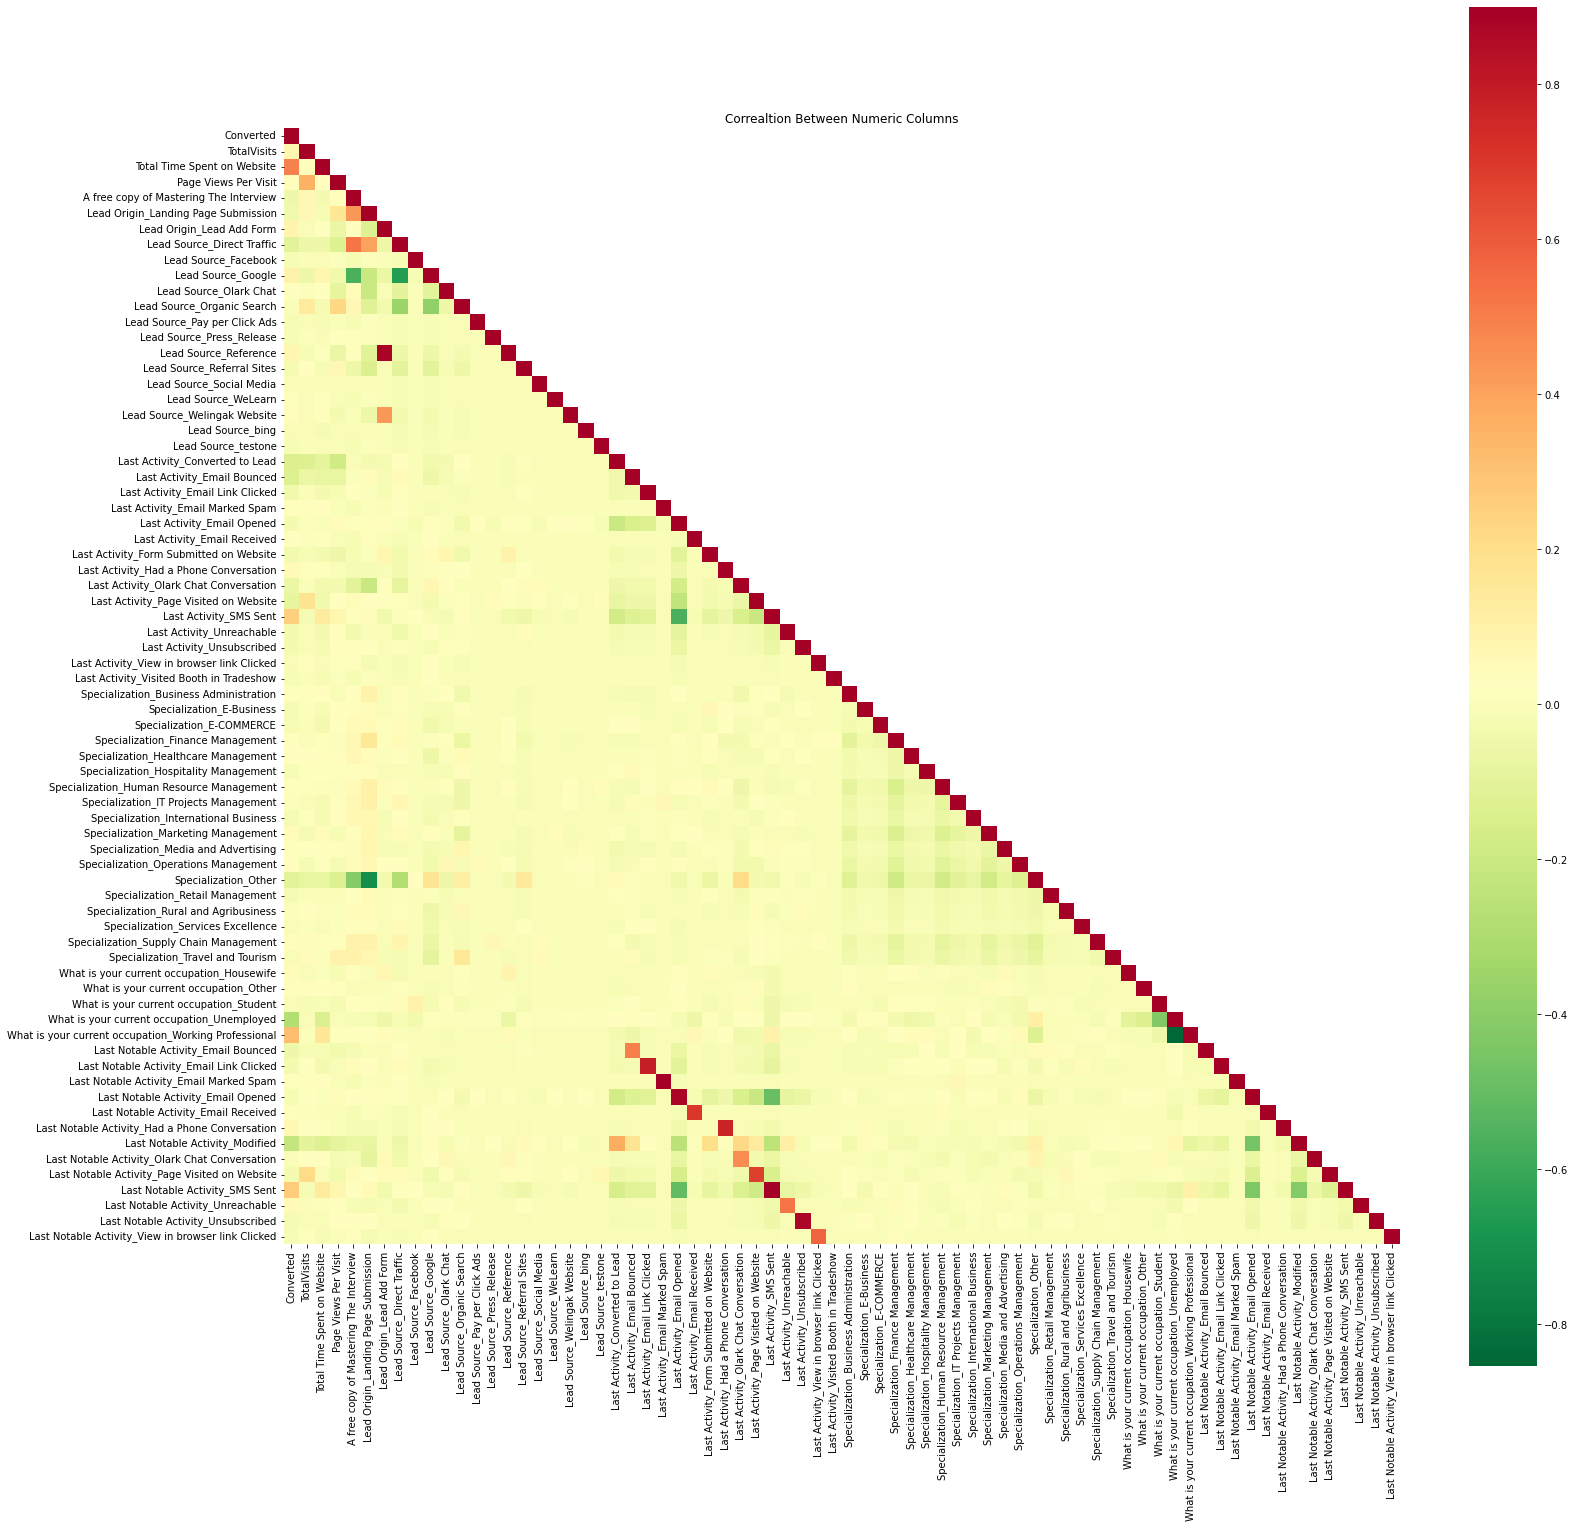

In [23]:
#Firstly, creating the correlation matrix
corr_mat = df_final.corr()
corr_mat_mask = np.array(corr_mat)
#Creating a heatmap
corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[25,25])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.9, square=True, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

### 1.5 Train-Test Split

In [24]:
# Creating a list of numeric features
scale_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Creating Features and Dependent variable sets
X = df_final.drop(labels='Converted',axis=1)
y = df_final['Converted']

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3, random_state=40) 

### 1.6 Feature Scaling

In [25]:
# Performing Standard Scaling on the dataset
scaler = StandardScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

## Model Building

### 2.1 Model 1

In [26]:
# Creating a function to create a statsmodel
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.GLM(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

# Creating a function to check the VIF values    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 5)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [27]:
# Creating a function to return columns which are to be eliminated
def Check_RFE(model, X_train, y_train, n_feat):
    
    rfe = RFE(model, n_features_to_select = n_feat)
    rfe = rfe.fit(X_train, y_train)
    ref_df = pd.DataFrame(data={'Column':X_train.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
    res = ref_df.sort_values(by=['Rank'],ascending=True)
    return res[res['RFE']==False]

In [28]:
# Creating a fucntion to build a logistics regression model
def Build_LogModel(model_no, X_train, y_train):
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
#     print("Model "+str(model_no)+":",logmodel.fit(X_train,y_train))
    return logmodel

In [29]:
logmodel_1 = Build_LogModel(1, X_train, y_train)

In [30]:
X_train_new = build_model(X_train, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3378
Model Family:                Gaussian   Df Model:                           68
Link Function:               Identity   Scale:                         0.15073
Method:                          IRLS   Log-Likelihood:                -1595.0
Date:                Sun, 16 Feb 2025   Deviance:                       509.18
Time:                        17:07:17   Pearson chi2:                     509.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4779
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [31]:
checkVIF(X_train_new)

,Features,VIF
61,Last Notable Activity_Email Marked Spam,inf
10,Lead Source_Olark Chat,inf
20,Lead Source_testone,inf
19,Lead Source_bing,inf
17,Lead Source_WeLearn,inf
16,Lead Source_Social Media,inf
15,Lead Source_Referral Sites,inf
13,Lead Source_Press_Release,inf
11,Lead Source_Organic Search,inf
12,Lead Source_Pay per Click Ads,inf


In [32]:
Check_RFE(logmodel_1,X_train,y_train,50)

,Column,RFE,Rank
38,Specialization_Finance Management,False,2
51,Specialization_Supply Chain Management,False,3
18,Lead Source_bing,False,4
23,Last Activity_Email Marked Spam,False,5
10,Lead Source_Organic Search,False,6
60,Last Notable Activity_Email Marked Spam,False,7
12,Lead Source_Press_Release,False,8
49,Specialization_Rural and Agribusiness,False,9
33,Last Activity_View in browser link Clicked,False,10
25,Last Activity_Email Received,False,11


### 2.2 Model 2

In [33]:
X_train_2 = X_train.drop(labels=['Last Activity_SMS Sent','Last Activity_Email Opened','Last Notable Activity_Email Opened','Last Notable Activity_Modified','Last Notable Activity_SMS Sent','Last Notable Activity_Page Visited on Website','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Social Media','Lead Source_Referral Sites','Lead Source_Pay per Click Ads','Lead Source_testone','Lead Source_bing','Last Notable Activity_Email Received','Lead Source_Facebook','Last Activity_Email Received','A free copy of Mastering The Interview','Last Activity_View in browser link Clicked','Last Activity_Visited Booth in Tradeshow','Last Notable Activity_Email Marked Spam'],axis=1)
X_test_2 = X_test.drop(labels=['Last Activity_SMS Sent','Last Activity_Email Opened','Last Notable Activity_Email Opened','Last Notable Activity_Modified','Last Notable Activity_SMS Sent','Last Notable Activity_Page Visited on Website','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Social Media','Lead Source_Referral Sites','Lead Source_Pay per Click Ads','Lead Source_testone','Lead Source_bing','Last Notable Activity_Email Received','Lead Source_Facebook','Last Activity_Email Received','A free copy of Mastering The Interview','Last Activity_View in browser link Clicked','Last Activity_Visited Booth in Tradeshow','Last Notable Activity_Email Marked Spam'],axis=1)
                       
X_train_new = build_model(X_train_2, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3395
Model Family:                Gaussian   Df Model:                           51
Link Function:               Identity   Scale:                         0.15512
Method:                          IRLS   Log-Likelihood:                -1653.1
Date:                Sun, 16 Feb 2025   Deviance:                       526.64
Time:                        17:07:21   Pearson chi2:                     527.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4505
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [34]:
checkVIF(X_train_new)

,Features,VIF
0,const,1215.12166
43,What is your current occupation_Unemployed,129.77579
44,What is your current occupation_Working Profes...,100.87344
42,What is your current occupation_Student,32.66262
5,Lead Origin_Lead Add Form,17.07732
10,Lead Source_Reference,14.04176
34,Specialization_Other,5.58547
41,What is your current occupation_Other,4.08954
11,Lead Source_Welingak Website,4.00647
21,Last Activity_Unsubscribed,3.58230


In [35]:
logmodel_2 = Build_LogModel(2, X_train_2, y_train)
Check_RFE(logmodel_2,X_train_2,y_train,40)

,Column,RFE,Rank
24,Specialization_Finance Management,False,2
31,Specialization_Media and Advertising,False,3
35,Specialization_Rural and Agribusiness,False,4
8,Lead Source_Press_Release,False,5
27,Specialization_Human Resource Management,False,6
14,Last Activity_Email Marked Spam,False,7
32,Specialization_Operations Management,False,8
30,Specialization_Marketing Management,False,9
28,Specialization_IT Projects Management,False,10
7,Lead Source_Organic Search,False,11


### 2.3 Model 3

In [36]:
X_train_3 = X_train_2.drop(labels=['What is your current occupation_Unemployed','What is your current occupation_Working Professional','What is your current occupation_Student','Specialization_Retail Management','Last Activity_Had a Phone Conversation','Last Activity_Email Marked Spam','Lead Origin_Lead Add Form','Lead Source_Reference','Lead Source_Olark Chat', 'What is your current occupation_Other','Last Notable Activity_Unsubscribed'],axis=1)
X_test_3 = X_test_2.drop(labels=['What is your current occupation_Unemployed','What is your current occupation_Working Professional','What is your current occupation_Student','Specialization_Retail Management','Last Activity_Had a Phone Conversation','Last Activity_Email Marked Spam','Lead Origin_Lead Add Form','Lead Source_Reference','Lead Source_Olark Chat', 'What is your current occupation_Other','Last Notable Activity_Unsubscribed'],axis=1)

X_train_new = build_model(X_train_3, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3406
Model Family:                Gaussian   Df Model:                           40
Link Function:               Identity   Scale:                         0.16678
Method:                          IRLS   Log-Likelihood:                -1783.5
Date:                Sun, 16 Feb 2025   Deviance:                       568.05
Time:                        17:07:23   Pearson chi2:                     568.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [37]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.37728
29,Specialization_Other,4.53422
20,Specialization_Finance Management,2.81015
23,Specialization_Human Resource Management,2.67790
26,Specialization_Marketing Management,2.59162
11,Last Activity_Email Link Clicked,2.47819
36,Last Notable Activity_Email Link Clicked,2.47758
4,Lead Origin_Landing Page Submission,2.37601
28,Specialization_Operations Management,1.98522
17,Specialization_Business Administration,1.84927


In [38]:
logmodel_3 = Build_LogModel(3, X_train_3, y_train)
Check_RFE(logmodel_3,X_train_3,y_train,30)

,Column,RFE,Rank
22,Specialization_Human Resource Management,False,2
19,Specialization_Finance Management,False,3
26,Specialization_Media and Advertising,False,4
30,Specialization_Services Excellence,False,5
5,Lead Source_Organic Search,False,6
20,Specialization_Healthcare Management,False,7
23,Specialization_IT Projects Management,False,8
27,Specialization_Operations Management,False,9
17,Specialization_E-Business,False,10
25,Specialization_Marketing Management,False,11


### 2.4 Model 4

In [39]:
X_train_4 = X_train_3.drop(labels=['Lead Source_Organic Search','Lead Source_Press_Release','Specialization_E-Business','Specialization_E-COMMERCE','Specialization_Healthcare Management','Specialization_IT Projects Management','Specialization_Operations Management','Specialization_Services Excellence','Last Notable Activity_Olark Chat Conversation'],axis=1)
X_test_4 = X_test_3.drop(labels=['Lead Source_Organic Search','Lead Source_Press_Release','Specialization_E-Business','Specialization_E-COMMERCE','Specialization_Healthcare Management','Specialization_IT Projects Management','Specialization_Operations Management','Specialization_Services Excellence','Last Notable Activity_Olark Chat Conversation'],axis=1)

X_train_new = build_model(X_train_4, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3415
Model Family:                Gaussian   Df Model:                           31
Link Function:               Identity   Scale:                         0.16642
Method:                          IRLS   Log-Likelihood:                -1784.3
Date:                Sun, 16 Feb 2025   Deviance:                       568.32
Time:                        17:07:25   Pearson chi2:                     568.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3845
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [40]:
checkVIF(X_train_new)

,Features,VIF
0,const,13.38182
22,Specialization_Other,2.61206
9,Last Activity_Email Link Clicked,2.47187
28,Last Notable Activity_Email Link Clicked,2.47111
4,Lead Origin_Landing Page Submission,2.36977
3,Page Views Per Visit,1.49847
1,TotalVisits,1.49239
16,Specialization_Finance Management,1.39681
8,Last Activity_Email Bounced,1.38702
18,Specialization_Human Resource Management,1.36850


In [41]:
logmodel_4 = Build_LogModel(4, X_train_4, y_train)
Check_RFE(logmodel_4,X_train_4,y_train,15)

,Column,RFE,Rank
4,Lead Source_Direct Traffic,False,2
5,Lead Source_Welingak Website,False,3
16,Specialization_Hospitality Management,False,4
30,Last Notable Activity_View in browser link Cli...,False,5
27,Last Notable Activity_Email Link Clicked,False,6
24,Specialization_Travel and Tourism,False,7
18,Specialization_International Business,False,8
14,Specialization_Business Administration,False,9
0,TotalVisits,False,10
2,Page Views Per Visit,False,11


### 2.5 Model 5

In [42]:
X_train_5 = X_train_4.drop(labels=['Lead Source_Welingak Website','Specialization_Finance Management','Specialization_Human Resource Management','Specialization_Marketing Management','Specialization_Media and Advertising','Specialization_Rural and Agribusiness','Last Notable Activity_View in browser link Clicked'],axis=1)
X_test_5 = X_test_4.drop(labels=['Lead Source_Welingak Website','Specialization_Finance Management','Specialization_Human Resource Management','Specialization_Marketing Management','Specialization_Media and Advertising','Specialization_Rural and Agribusiness','Last Notable Activity_View in browser link Clicked'],axis=1)

X_train_new = build_model(X_train_5, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3422
Model Family:                Gaussian   Df Model:                           24
Link Function:               Identity   Scale:                         0.16626
Method:                          IRLS   Log-Likelihood:                -1786.2
Date:                Sun, 16 Feb 2025   Deviance:                       568.94
Time:                        17:07:26   Pearson chi2:                     569.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [43]:
logmodel_5 = Build_LogModel(5, X_train_5, y_train)
Check_RFE(logmodel_5,X_train_5,y_train,8)

,Column,RFE,Rank
9,Last Activity_Olark Chat Conversation,False,2
10,Last Activity_Page Visited on Website,False,3
11,Last Activity_Unreachable,False,4
7,Last Activity_Email Link Clicked,False,5
20,Last Notable Activity_Email Bounced,False,6
8,Last Activity_Form Submitted on Website,False,7
12,Last Activity_Unsubscribed,False,8
4,Lead Source_Direct Traffic,False,9
14,Specialization_Hospitality Management,False,10
21,Last Notable Activity_Email Link Clicked,False,11


### 2.6 Model 6

In [44]:
X_train_6 = X_train_5.drop(labels=['Specialization_Supply Chain Management','Last Notable Activity_Email Link Clicked','Specialization_Business Administration','Specialization_Hospitality Management'],axis=1)
X_test_6 = X_test_5.drop(labels=['Specialization_Supply Chain Management','Last Notable Activity_Email Link Clicked','Specialization_Business Administration','Specialization_Hospitality Management'],axis=1)

X_train_new = build_model(X_train_6, y_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3426
Model Family:                Gaussian   Df Model:                           20
Link Function:               Identity   Scale:                         0.16628
Method:                          IRLS   Log-Likelihood:                -1788.4
Date:                Sun, 16 Feb 2025   Deviance:                       569.67
Time:                        17:07:26   Pearson chi2:                     570.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3833
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [45]:
logmodel_6 = Build_LogModel(6, X_train_6, y_train)
Check_RFE(logmodel_6,X_train_6,y_train,15)

,Column,RFE,Rank
4,Lead Source_Direct Traffic,False,2
15,Specialization_Travel and Tourism,False,3
13,Specialization_International Business,False,4
0,TotalVisits,False,5
2,Page Views Per Visit,False,6


### 2.7 Model 7

In [46]:
X_train_7 = X_train_6.drop(labels=['Specialization_International Business','Last Notable Activity_Email Bounced','Specialization_Travel and Tourism'],axis=1)
X_test_7 = X_test_6.drop(labels=['Specialization_International Business','Last Notable Activity_Email Bounced','Specialization_Travel and Tourism'],axis=1)
X_train_new = build_model(X_train_7, y_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3429
Model Family:                Gaussian   Df Model:                           17
Link Function:               Identity   Scale:                         0.16644
Method:                          IRLS   Log-Likelihood:                -1791.6
Date:                Sun, 16 Feb 2025   Deviance:                       570.73
Time:                        17:07:27   Pearson chi2:                     571.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [47]:
logmodel_7 = Build_LogModel(7, X_train_7, y_train)
Check_RFE(logmodel_7,X_train_7,y_train,10)

,Column,RFE,Rank
11,Last Activity_Unreachable,False,2
7,Last Activity_Email Link Clicked,False,3
8,Last Activity_Form Submitted on Website,False,4
12,Last Activity_Unsubscribed,False,5
4,Lead Source_Direct Traffic,False,6
0,TotalVisits,False,7
2,Page Views Per Visit,False,8


### 3. Performance Analysis

#### 3.1 Confusion Matrix

In [48]:
# Choosing Model 7 as final one
X_trn = X_train_7
X_tst = X_test_7
y_trn = y_train
y_tst = y_test

logmodel_7.fit(X_trn,y_trn)
# Predicting on data
y_train_pred = logmodel_7.predict(X_trn)
y_test_pred = logmodel_7.predict(X_tst)
# Predicting probablities on data
y_train_pred_prob = logmodel_7.predict_proba(X_trn)
y_test_pred_prob = logmodel_7.predict_proba(X_tst)
# Printing the precision, recall and F1
target_names = ['Converted', 'Not-Converted']
print("Performance on the Test data:\n",metrics.classification_report(y_test, y_test_pred, target_names=target_names))

Performance on the Test data:
                precision    recall  f1-score   support

    Converted       0.76      0.79      0.77       796
Not-Converted       0.74      0.70      0.72       682

     accuracy                           0.75      1478
    macro avg       0.75      0.75      0.75      1478
 weighted avg       0.75      0.75      0.75      1478



In [49]:
# Creating a dataframe for class and predicted values
probs_df_train = pd.DataFrame(y_train_pred_prob,columns=['Not-Converted','Converted'])
probs_df_test = pd.DataFrame(y_test_pred_prob,columns=['Not-Converted','Converted'])

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':probs_df_train['Converted']})
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':probs_df_test['Converted']})
# Considering 50% as threshold for classification
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final['predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Printing the accuracy scores
print("Accuracy on the Training data:",round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),4))
print("Accuracy on the Test data:",round(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted),4))

Accuracy on the Training data: 0.7734
Accuracy on the Test data: 0.751


#### 3.2 ROC Curve

In [50]:
# Creating a function to plot the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

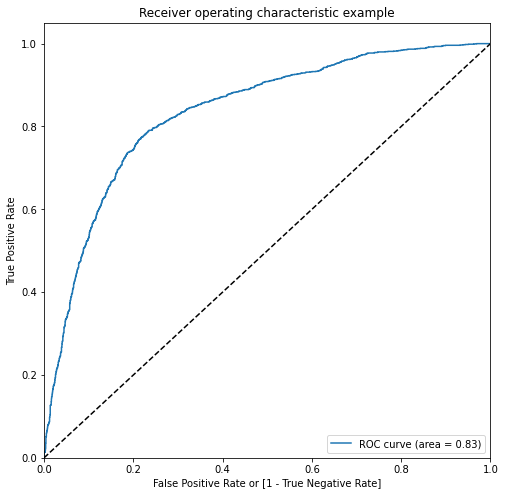

In [51]:
# Calculating FPR, TPR and Thresholds
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
# Plotting the ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### 3.3 Finding the Optimal Cutoff Point

In [52]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.329503,0,1,1,1,1,0,0,0,0,0,0
1,0,0.194887,0,1,1,0,0,0,0,0,0,0,0
2,1,0.884875,1,1,1,1,1,1,1,1,1,1,0
3,0,0.162872,0,1,1,0,0,0,0,0,0,0,0
4,0,0.277499,0,1,1,1,0,0,0,0,0,0,0


In [53]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.434001  1.000000  0.000000
0.1   0.1  0.535828  0.985294  0.191184
0.2   0.2  0.640847  0.929144  0.419785
0.3   0.3  0.739484  0.852941  0.652486
0.4   0.4  0.777198  0.777406  0.777037
0.5   0.5  0.773426  0.691845  0.835982
0.6   0.6  0.758050  0.606952  0.873911
0.7   0.7  0.730200  0.488636  0.915428
0.8   0.8  0.669278  0.293449  0.957458
0.9   0.9  0.597911  0.089572  0.987699


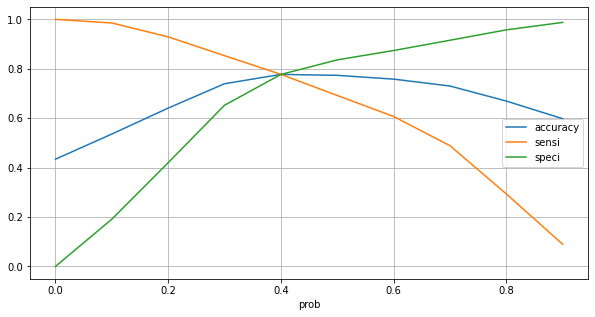

In [54]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (10,5))
plt.grid(True)
plt.show()

In [55]:
# From the curve above, 0.4 is the optimum point to take it as a cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.329503,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.194887,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.884875,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.162872,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.277499,0,1,1,1,0,0,0,0,0,0,0,0


In [56]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.329503,0,1,1,1,1,0,0,0,0,0,0,0,33
1,0,0.194887,0,1,1,0,0,0,0,0,0,0,0,0,19
2,1,0.884875,1,1,1,1,1,1,1,1,1,1,0,1,88
3,0,0.162872,0,1,1,0,0,0,0,0,0,0,0,0,16
4,0,0.277499,0,1,1,1,0,0,0,0,0,0,0,0,28


In [57]:
# Let's check the overall accuracy.
trainaccuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
testaccuracy= metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

confusion_TRN = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_TST = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )

## 4. Final Results

In [58]:
TP = confusion_TRN[1,1] # true positive 
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

TP_TST = confusion_TST[1,1] # true positive 
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

# Sensitivity (Recall) and Specificity for Train Data
trainsensitivity = TP / float(TP + FN)
trainspecificity = TN / float(TN + FP)

# Sensitivity (Recall) and Specificity for Test Data
testsensitivity = TP_TST / float(TP_TST + FN_TST)
testspecificity = TN_TST / float(TN_TST + FP_TST)

# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Recall      :{} %".format(round((trainsensitivity*100),2)))  # Recall for Train
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Recall       :{} %".format(round((testsensitivity*100),2)))  # Recall for Test
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :77.72 %
Train Data Recall      :77.74 %
Train Data Specificity :77.7 %
Test Data Accuracy     :75.85 %
Test Data Recall       :78.15 %
Test Data Specificity  :73.87 %
